In [7]:
############################## RNN - OVERFIT ##############################
#Note: Commented out code pieces are only needed in full dataset training 

import torch
import torch.optim as optim

import torchtext
from torchtext import data
import spacy

import argparse
import os


from models import *

import torch.nn as nn
from torch.autograd import Variable
import time

import matplotlib.pyplot as plt

#Hyperparameters 
learning_rate = 0.001
batch_size = 64
epochs = 100
seed = 0

torch.manual_seed(seed)

In [8]:
#Accuracy Function 
def accuracy(predictions, labels):
    totalCor = 0
    ind = 0
    
    for c in predictions:
        if (c.item()>0.5):
            r = 1.0
        else:
            r = 0.0
        
        if (r== labels[ind].item()):
            totalCor += 1
        ind += 1
    
    return (totalCor/len(labels))

Shape of Vocab: torch.Size([643, 100])
50
x torch.Size([69, 50])
torch.Size([69, 50, 100])
avg acc/epoch 0.5
[1,     1] avg loss/epoch: 0.720
50
x torch.Size([69, 50])
torch.Size([69, 50, 100])
avg acc/epoch 0.5
[2,     1] avg loss/epoch: 0.714
50
x torch.Size([69, 50])
torch.Size([69, 50, 100])
avg acc/epoch 0.5
[3,     1] avg loss/epoch: 0.708
50
x torch.Size([69, 50])
torch.Size([69, 50, 100])
avg acc/epoch 0.5
[4,     1] avg loss/epoch: 0.703
50
x torch.Size([69, 50])
torch.Size([69, 50, 100])
avg acc/epoch 0.5
[5,     1] avg loss/epoch: 0.699
50
x torch.Size([69, 50])
torch.Size([69, 50, 100])
avg acc/epoch 0.5
[6,     1] avg loss/epoch: 0.695
50
x torch.Size([69, 50])
torch.Size([69, 50, 100])
avg acc/epoch 0.5
[7,     1] avg loss/epoch: 0.692
50
x torch.Size([69, 50])
torch.Size([69, 50, 100])
avg acc/epoch 0.5
[8,     1] avg loss/epoch: 0.690
50
x torch.Size([69, 50])
torch.Size([69, 50, 100])
avg acc/epoch 0.5
[9,     1] avg loss/epoch: 0.689
50
x torch.Size([69, 50])
torch.Si

avg acc/epoch 0.98
[79,     1] avg loss/epoch: 0.518
50
x torch.Size([69, 50])
torch.Size([69, 50, 100])
avg acc/epoch 0.98
[80,     1] avg loss/epoch: 0.517
50
x torch.Size([69, 50])
torch.Size([69, 50, 100])
avg acc/epoch 0.98
[81,     1] avg loss/epoch: 0.516
50
x torch.Size([69, 50])
torch.Size([69, 50, 100])
avg acc/epoch 0.98
[82,     1] avg loss/epoch: 0.515
50
x torch.Size([69, 50])
torch.Size([69, 50, 100])
avg acc/epoch 0.98
[83,     1] avg loss/epoch: 0.515
50
x torch.Size([69, 50])
torch.Size([69, 50, 100])
avg acc/epoch 0.98
[84,     1] avg loss/epoch: 0.514
50
x torch.Size([69, 50])
torch.Size([69, 50, 100])
avg acc/epoch 0.98
[85,     1] avg loss/epoch: 0.512
50
x torch.Size([69, 50])
torch.Size([69, 50, 100])
avg acc/epoch 1.0
[86,     1] avg loss/epoch: 0.509
50
x torch.Size([69, 50])
torch.Size([69, 50, 100])
avg acc/epoch 1.0
[87,     1] avg loss/epoch: 0.507
50
x torch.Size([69, 50])
torch.Size([69, 50, 100])
avg acc/epoch 1.0
[88,     1] avg loss/epoch: 0.507
50
x 

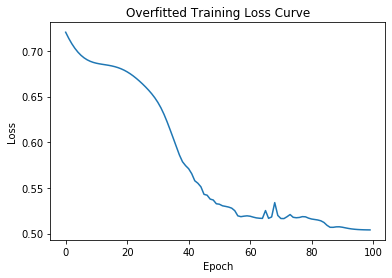

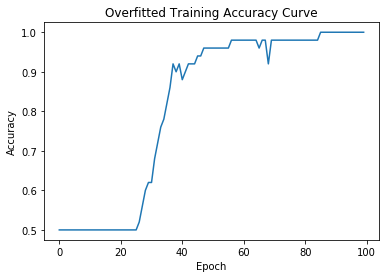

In [9]:
def main():
    # Instantiates 2 data.Field objects 
    TEXT = data.Field(sequential=True,lower=True, tokenize='spacy', include_lengths=True)
    LABELS = data.Field(sequential=False, use_vocab=False)

    # Load the overfit data
    train_data = data.TabularDataset(
            path='data/overfit.tsv', format='tsv',
            skip_header=True, fields=[('text', TEXT), ('label', LABELS)])

    # Create an object that can be enumerated (for training loop later)
    train_iter = data.BucketIterator(
      train_data, batch_size=batch_size,
    sort_key=lambda x: len(x.text), device=None, sort_within_batch=True, repeat=False)
    
    # Vocab object contains the index/token for each unique word in the dataset (looks through all sentences in dataset)
    TEXT.build_vocab(train_data)

    # Loading GloVe Vector and Using Embedding Layer
    TEXT.vocab.load_vectors(torchtext.vocab.GloVe(name='6B', dim=100))
    vocab = TEXT.vocab

    print("Shape of Vocab:",TEXT.vocab.vectors.shape) #number of unique words 
    
    # Training the model ----------------------------------------------------------------
    # Reproducability 
    torch.manual_seed(seed)

    # Initiate model 
    model = RNN(100,vocab,100) #CHANGE MODEL HERE 
    
    # Define loss and optimzer functions 
    loss_fnc = nn.BCEWithLogitsLoss()
    optimizer = torch.optim.Adam(model.parameters(),lr = learning_rate)

 
    # Store for plotting
    loss_list = []
    acc_list = []
    nepoch = []

    #val_acc_list = []
    #val_loss_list = []

    # TRAINING LOOP  ----------------------------------------------------------------
    #start_time = time.time()
    for e in range(epochs): 
        nepoch = nepoch + [e]

        batchloss_accum = 0.0
        batchacc_accum = 0.0
        #model.train() 

        #for batch in train_iter: #len train_iter is number of batches 
        for i, batch in enumerate(train_iter, 0):
            correct = 0 
            total = 0  
            
            # Zero parameter gradients
            optimizer.zero_grad()
            
            #Run model on inputs
            #print(batch.text)#(batch input = sentence, batch input length = 15s --> tuple of 2 tensors)
            batch_input, batch_input_length = batch.text

            outputs = model(batch_input,batch_input_length) #batch_input has size [sentence length, batch size]
            #print(outputs)
            #print(batch.label.float().shape)
            
            #Compute loss
            batchloss = loss_fnc(outputs, batch.label.float()) #(batch.label) (tensor of 64 1s and 0s)
            batchloss_accum = batchloss_accum + batchloss.item() #added values of loss for all batches
            #print('batchloss',batchloss)
            
            batchloss.backward()
            optimizer.step()
            
            batchacc = accuracy(outputs,batch.label.float())
            batchacc_accum = batchacc_accum + batchacc  
            #print("Batch accuracy",batchacc)

            
            if i == len(train_iter)-1: 
                #model.eval()
                #vacc, vloss = evaluate(model,val_iter)
                
                print("avg acc/epoch", batchacc_accum/len(train_iter))
                print('[%d, %5d] avg loss/epoch: %.3f' % (e + 1, i + 1, batchloss_accum/len(train_iter)))
                
                #print("validation loss:", vloss)
                #print("validation acc:", vacc)

                loss_list = loss_list + [batchloss_accum/len(train_iter)]
                acc_list = acc_list + [batchacc_accum/len(train_iter)]
                
                #val_acc_list.append(vacc)   
                #val_loss_list.append(vloss)

                batchloss_accum = 0.0
                batchacc_accum = 0.0 
    # TRAIN LOSS 
    plt.plot(nepoch,loss_list)
    plt.xlabel("Epoch")
    plt.ylabel("Loss") 
    plt.title("Overfitted Training Loss Curve")
    plt.show() 

    # TRAIN ACC
    plt.plot(nepoch,acc_list)
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy") 
    plt.title("Overfitted Training Accuracy Curve")
    plt.show()   


if __name__ == '__main__':
    main()

